# Valores Atípicos

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
data = np.random.randn(50000) * + 20

def find_anomalies(data):
  anomalies = []

  data_std = np.std(data)
  data_mean = np.mean(data)

  anomaly_cut = data_std * 3 # 3 veces la desviacion estandard

  low_limit = data_mean - anomaly_cut
  upp_limit = data_mean + anomaly_cut

  print(low_limit, ' - ', upp_limit)
  for datum in data:
    if datum > upp_limit or datum < low_limit:
      anomalies.append(datum)

  return anomalies

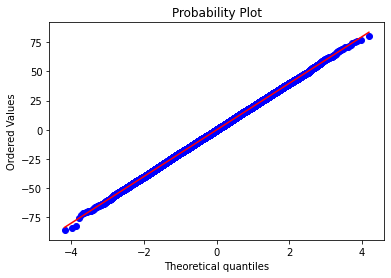

In [3]:
from scipy.stats import probplot, shapiro

probplot(data, plot = plt)
plt.show()

In [4]:
statistic, pval = shapiro(data)
pval

0.8501955270767212

* UN $p-valor > 0.05$ INDICA UNA DISTRIBUCIÓN NORMAL
* ES UNA DISTRIBUCIÓN NORMAL

In [5]:
anomalies = find_anomalies(data)
len(anomalies)

-59.95106781869348  -  59.858197671352535


152

Hay $151$ datos atípicos

In [6]:
import pandas as pd
stocks = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/stocks.csv',
                     header='infer')
stocks.index = stocks.Date
stocks = stocks.drop(['Date'], axis = 1)
stocks.head(3)

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002


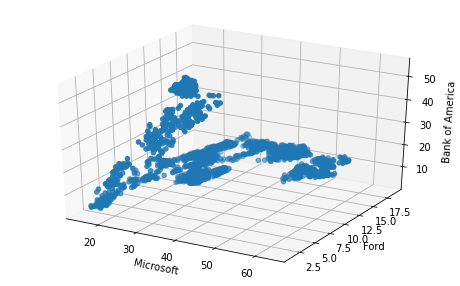

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 5)).gca(projection = '3d')
fig.scatter(stocks.MSFT, stocks.F, stocks.BAC)
fig.set_xlabel('Microsoft')
fig.set_ylabel('Ford')
fig.set_zlabel('Bank of America')
plt.show()

In [8]:
# Boxplot
data = np.random.randn(50000) * 20 + 20
data = pd.DataFrame(data, columns = ['random'])
data

,random
0,11.588863
1,-7.254205
2,-8.421744
3,13.314979
4,21.817008
...,...
49995,39.475966
49996,53.827079
49997,24.098991
49998,32.175451


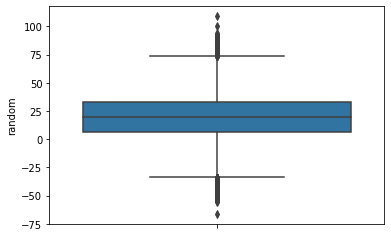

In [9]:
import seaborn as sns

sns.boxplot(y = 'random', data = data)
plt.show()

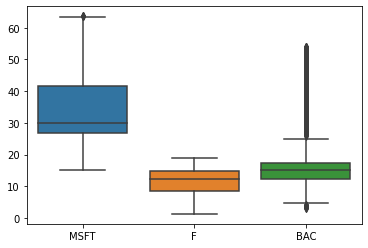

In [10]:
sns.boxplot(data = stocks)
plt.show()

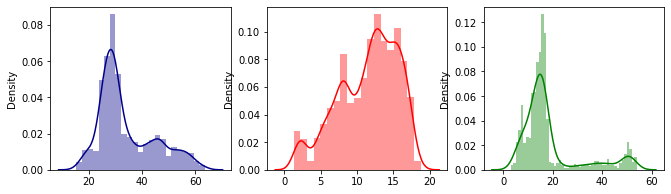

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (11, 3))
sns.distplot(x = stocks.MSFT, ax = ax[0], color = 'darkblue')
sns.distplot(x = stocks.F, ax = ax[1], color = 'red')
sns.distplot(x = stocks.BAC, ax = ax[2], color = 'green')
plt.show()

# Detección de anomalías

## DBScan


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

from sklearn.cluster import DBSCAN
from  collections import Counter

In [13]:
df = pd.read_csv("https://bit.ly/3arouNg")
df.shape

(6463, 13)

In [14]:
df.head(3)

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [15]:
data = df.iloc[:, 1:3]
data.head(1)

,fixed acidity,volatile acidity
0,7.0,0.27


In [16]:
model = DBSCAN(eps = 0.2, min_samples = 20).fit(data)
print(model)

DBSCAN(eps=0.2, min_samples=20)


In [17]:
print(Counter(model.labels_ ))
outliers_df = pd.DataFrame(data)
print(outliers_df[model.labels_ == -1])

Counter({0: 6281, -1: 117, 1: 40, 2: 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


No handles with labels found to put in legend.


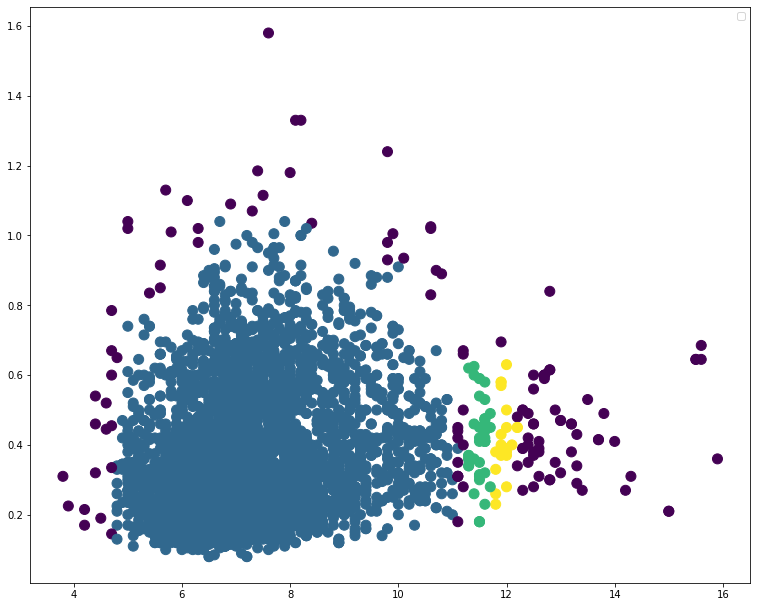

In [18]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 2, 2])
colors = model.labels_

ax.scatter(data.iloc[:, 0].values, data.iloc[:,1], c = colors, s = 100 )
plt.legend()
plt.show()

# Kernel PCA

In [19]:
import scipy
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def rbf_kpca(X, gamma, n_components):
  # distancias cuadradas de cada pareja
  # del conjunto de datos, es MxN-dimensional
  sq_dists = pdist(X, 'sqeuclidean')
  print(sq_dists.shape)

  # convertirla en matriz
  mat_sq_dists = squareform(sq_dists)
  print(mat_sq_dists.shape)

  # Matriz de núcleos
  K = np.exp(-gamma* mat_sq_dists)

  # Centrar la matriz de núcleos
  N = K.shape[0]
  one_n = np.ones((N, N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n) # K - 1K - K1 + 1K1

  # Eigenpares
  eigenvals, eigenvecs = eigh(K) # devuelve los eigenpares ordenados ascendentemente
  eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1] # [::-1] Invierte el orden

  # Elegir los k primeros eigenvects
  alphas = np.column_stack([eigenvecs[:, i] for i in range(n_components)])

  # Eigenvals
  lambdas = np.column_stack([eigenvals[i] for i in range(n_components)])

  return alphas, lambdas

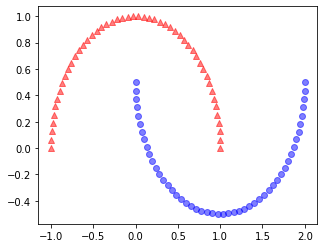

In [21]:
# Medias lunas
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

In [22]:
# Supongamos que se separan linealmente
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

(-1.0, 1.0)

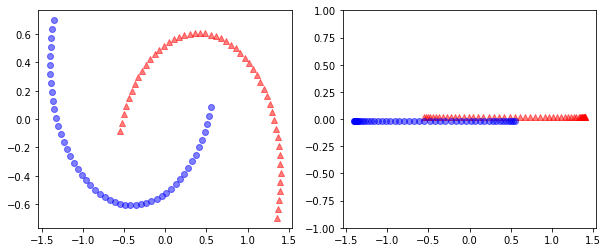

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_pca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_pca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])

(4950,)
(100, 100)


(-1.0, 1.0)

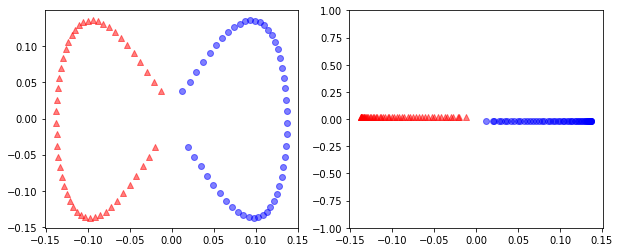

In [24]:
X_kpca, l = rbf_kpca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])

(-1.0, 1.0)

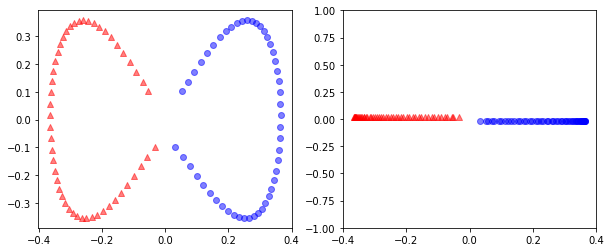

In [25]:
# KPCA de sklearn
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])

(-1.0, 1.0)

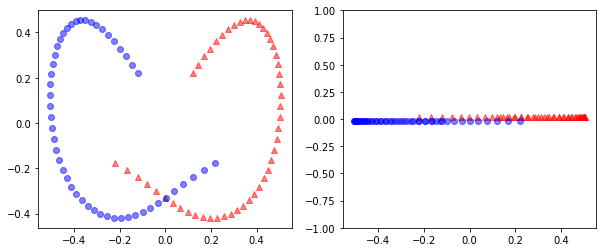

In [26]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 5)
X_kpca = kpca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])

(-1.0, 1.0)

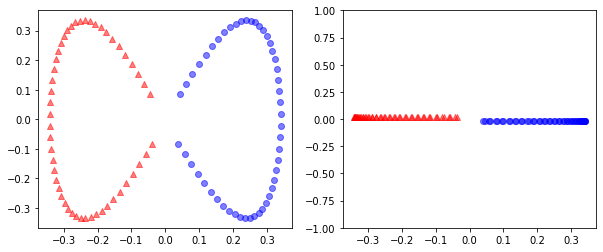

In [27]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 20)
X_kpca = kpca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])

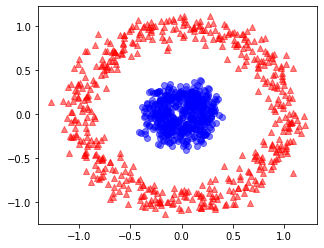

In [28]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

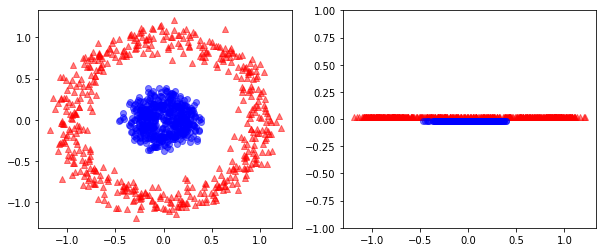

In [29]:
# Con PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

ax[0].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_pca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_pca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])
plt.show()

(499500,)
(1000, 1000)


(-1.0, 1.0)

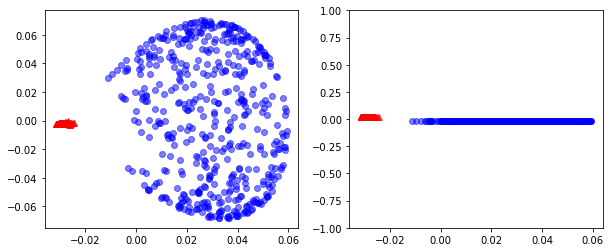

In [30]:
X_kpca, l = rbf_kpca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])

(-1.0, 1.0)

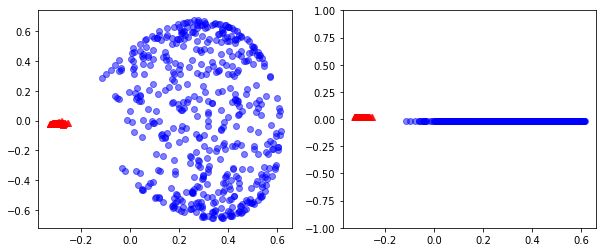

In [31]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15 )
X_kpca = kpca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])

Reflexión: 

La idea de PCA es una idea que me resultó interesante por la aplicación que encuentra el álgebra lineal en el, sin embargo las ideas vistas en este notebook, me parecen aún mejores y bastante novedosas. La idea de aumentar la dimensión y después proyectarlo es una idea que geometricamente me parece genial. Eso habla de la cantidad de matemáticas que hay detrás de estos algoritmos. Y es que en matemáticas, aunque no lo parezca, a veces resulta útil y mucho más fácil elevar la dimensión y después regresar a lo que estamos trabajando y ver la aplicación de esta idea en machine learning me fué bastante grato. Por otro lado, yo soy un matemático que ha dedicado mucho de su investigación a la geometría de topología no-trivial, y muchas de las aplicaciones que he encontrado de ella son principalmente en física. Sin embargo, encontrar que existe un algoritmo basado completamente en esta rama, resultó muy llamativo para mi, me pregunto cosas como que tanto influye la conexión afín en el manifold learning, o si existe alguna aplicación de las métricas Riemannianas, incluso si existe algún tipo de datos que al ser representado como un manifold, presenta singularidades y como serían tratadas estas. Sinceramente esto me resulta realmente interesante,  creo que es una rama en la que me gustaría profundizar más. Y es que al pensarlo tiene todo el sentido, tener tablas con muchas variables, cobra sentido representarlo mediante una variedad de alta dimensión, en fin, creo que es algo de lo que definitivamente leere más. Así que agradezco el mostrarnos un tema tan interesante. Si tiene alguna recomendación la agradeceré.